<font color='blue'> Привет. Ниже мои комментарии выделены синим. </font>

# Аналитика в Яндекс.Афише

## Шаг 0. Введение

Необходимо помочь маркетологам Яндекс.Афиши оптимизировать маркетинговые затраты.
Изучим: как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент и когда окупается каждый клиент.

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Шаг 1. Загрузка данных и подготовка их к анализу

In [2]:
visits=pd.read_csv('/datasets/visits_log.csv')
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
orders=pd.read_csv('/datasets/orders_log.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [4]:
costs=pd.read_csv('/datasets/costs.csv')
costs.info()
costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [5]:
visits=pd.read_csv('/datasets/visits_log.csv')
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Пропусков данных нет. Типы столбцов определены верно, за исключением дат.

<font color='blue'> Ок, да данные достаточно чистые. Можно переходить к анализу. </font>

## Шаг 2. Построение отчётов и подсчет метрик

Сперва приведем столбцы с датами к нужному типу

In [6]:
visits['Start Ts']=pd.to_datetime(visits['Start Ts'])
visits['End Ts']=pd.to_datetime(visits['End Ts'])
orders['Buy Ts']=pd.to_datetime(orders['Buy Ts'])

Добавим столбцы: день, неделя, месяц

In [7]:
visits2=visits
visits2['day']=visits2['Start Ts'].dt.date
visits2['week']=visits2['Start Ts'].dt.week
visits2['month']=visits2['Start Ts'].dt.to_period('M')

### Продукт

Подсчитаем посещаемость 

In [8]:
visits_day=visits2.groupby(['day']).agg({'Uid':'nunique'})
print('В среднем уникальных посетителей в день -',int(visits_day.median()))

В среднем уникальных посетителей в день - 921


In [9]:
visits_week=visits2.groupby(['week']).agg({'Uid':'nunique'})
print('В среднем уникальных посетителей в неделю -',int(visits_week.median()))

В среднем уникальных посетителей в неделю - 6233


In [10]:
visits_month=visits2.groupby(['month']).agg({'Uid':'nunique'})
print('В среднем уникальных посетителей в месяц -',int(visits_month.median()))

В среднем уникальных посетителей в месяц - 24240


Взглянем на распределение по месяцам

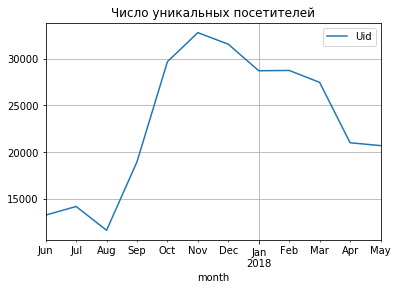

In [11]:
visits_month.plot(grid=True, title='Число уникальных посетителей')

Узнаем среднее количество сессий в день

In [12]:
int(visits2.groupby(['day']).agg({'Start Ts':'count'}).median())

1003

Взглянем на распределение в течение года

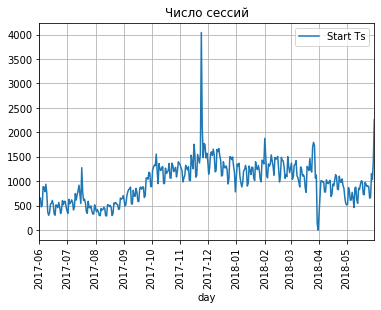

In [13]:
visits2.groupby(['day']).agg({'Start Ts':'count'}).plot(grid=True, title='Число сессий',rot=90)

Выясним сколько длится одна сессия

In [14]:
visits2['duration']=(visits2['End Ts']-visits2['Start Ts']).dt.seconds/60

Посмотрим на распределение

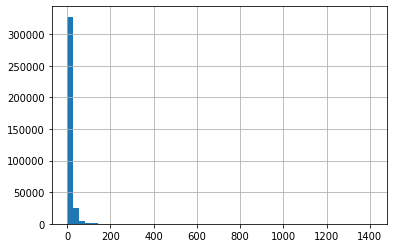

In [15]:
visits2['duration'].hist(bins=50)

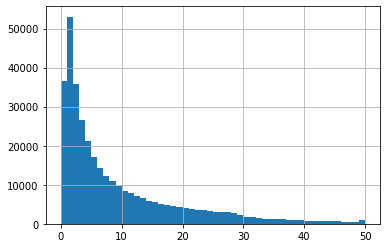

In [16]:
visits2['duration'].hist(bins=50,range=(0,50))

In [17]:
print('Средняя длительность сессии -', int(visits2['duration'].mode()),'мин')

Средняя длительность сессии - 1 мин


<font color='blue'> Статические показатели рассчитаны верно. Здесь полезно посмотреть динамику, чтобы сделать бюолее подробные выводы. Построй изменение показателей по времени. Для длительности сессий построй гистограмму. </font>

<font color='red'> Хорошо. </font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3f3309890>]],
      dtype=object)

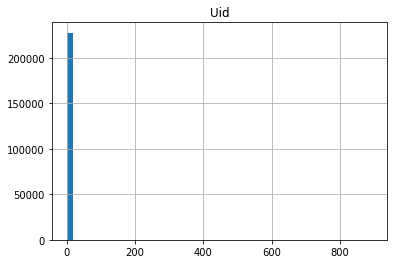

In [18]:
visits2.groupby(['Uid']).agg({'Uid':'count'}).hist(bins=50)

Вясним как часто люди возвращаются

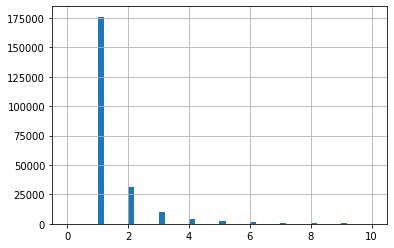

In [19]:
visits2['Uid'].value_counts().hist(bins=50,range=(0,10))

In [20]:
print('В среднем люди возвращаются',int((visits2.groupby(['Uid']).agg({'Uid':'count'})).mean()-1),'раз')

В среднем люди возвращаются 0 раз


<font color='blue'> Здесь надо провести когортный анализ посещений и рассчитать retention для каждого месяца каждой когорты. </font>

Проведем когортный анализ посещений и рассчитаем retention для каждого месяца каждой когорты

In [55]:
visits_first=visits.groupby('Uid')['Start Ts'].min()
visits_first.name = 'first_activity_month'

user_activity = visits.join(visits_first,on='Uid')
user_activity['Start Ts'] = user_activity['Start Ts'].astype('datetime64[M]')
user_activity['first_activity_month'] = user_activity['first_activity_month'].astype('datetime64[M]')
user_activity=user_activity.rename(columns=({'Start Ts':'activity_month','Uid':'uid'}))

user_activity['cohort_lifetime'] = (user_activity['activity_month'] - user_activity['first_activity_month'])/ (np.timedelta64(1,'M'))
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].round()

In [56]:
cohorts = user_activity.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
inital_users_count = inital_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(inital_users_count,on='first_activity_month')

cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts['first_activity_month']=cohorts['first_activity_month'].dt.to_period('M')
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

In [57]:
retention_pivot

cohort_lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_activity_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


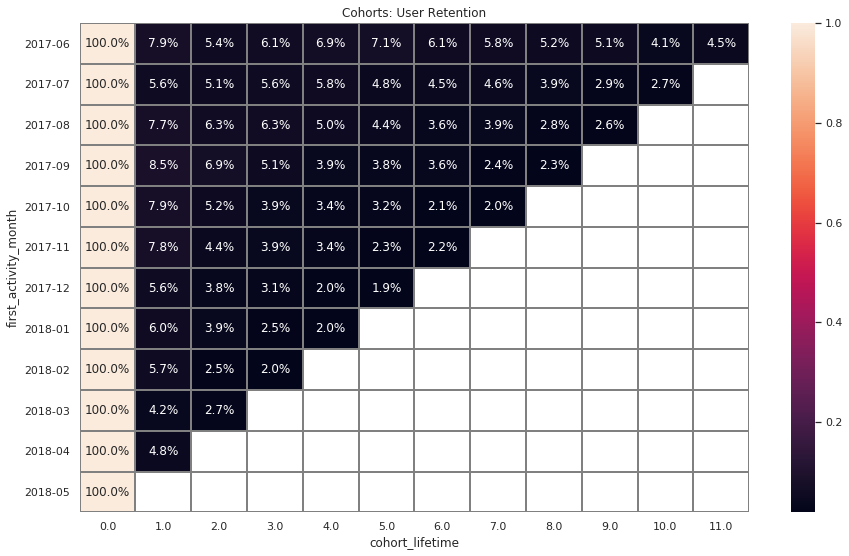

In [58]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

<font color='red'> retention рассчитан не верно. </font>

В прошлый раз рассчитывал retention по таблице orders. Теперь пересчитал по visits

<font color='blood'> Да, теперь все верно. Да retention это имеено про посещзения, а не про покупки. </font>

### Продажи

Добавим к таблице visits информацию о покупках

In [736]:
def cross(row):
    uid=row['Uid']
    for label, orde in orders[orders['Uid']==uid].iterrows():
        if (row['Start Ts']<=orde['Buy Ts'])and(orde['Buy Ts']<=row['End Ts']):
            return orde['Buy Ts']
                                                      
visits['Buy Ts'] = visits.apply(cross, axis=1)   

!!! Таблица объемная - расчет займет около 10 минут !!!  другого способа объединить таблицы не нашел

In [737]:
visits=visits[~visits['Buy Ts'].isna()]
visits=visits.merge(orders[['Revenue','Buy Ts']],on='Buy Ts',how='left')
visits

,Device,End Ts,Source Id,Start Ts,Uid,day,week,month,duration,Buy Ts,Revenue
0,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018-02-12,7,2018-02,66.000000,2018-02-12 19:48:00,0.73
1,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,15857957287537270437,2018-03-12,11,2018-03,12.000000,2018-03-12 23:17:00,1.83
2,desktop,2017-10-03 10:30:00,1,2017-10-03 10:10:00,18169507838259737849,2017-10-03,40,2017-10,20.000000,2017-10-03 10:13:00,2.75
3,desktop,2018-02-25 23:43:00,5,2018-02-25 23:35:00,9344114199116964256,2018-02-25,8,2018-02,8.000000,2018-02-25 23:36:00,0.98
4,desktop,2018-04-19 17:48:00,1,2018-04-19 17:46:00,3577449367987547907,2018-04-19,16,2018-04,2.000000,2018-04-19 17:47:00,5.13
...,...,...,...,...,...,...,...,...,...,...,...
43065,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,2018-01,0.316667,2018-01-25 17:38:00,2.93
43066,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,2018-03,0.316667,2018-03-03 10:12:00,0.61
43067,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,2017-11,0.316667,2017-11-02 10:12:00,3.67
43068,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,2017-11,0.316667,2017-11-02 10:12:00,2.69


Посмотрим когда люди начинают покупать

In [740]:
visits3=visits

In [741]:
visits3['buy_time']=(visits3['Buy Ts']-visits3['Start Ts']).dt.seconds
print('В среднем люди начинают покупать через',round(visits3['buy_time'].mean()/60,1),'минут после попадания на сайт')

В среднем люди начинают покупать через 10.1 минут после попадания на сайт


Подсчитаем сколько раз покупают в разные периоды

In [742]:
a=int((visits3.groupby(['day']).agg({'Buy Ts':'nunique'}).mean()))
print('В среднем каждый день делают',a,'покупок')

В среднем каждый день делают 92 покупок


In [743]:
a=int((visits3.groupby(['week']).agg({'Buy Ts':'nunique'})).mean())
print('В среднем каждую неделю делают',a,'покупок')

В среднем каждую неделю делают 647 покупок


In [744]:
a=int((visits3.groupby(['month']).agg({'Buy Ts':'nunique'})).mean())
print('В среднем каждый месяц делают',a,'покупок')

В среднем каждый месяц делают 2805 покупок


<font color='blue'> Здесь надо также рассчитать скалько покупок делает пользователь в среднем. </font>

Подсчитаем сколько покупок делает средний клиент в месяц

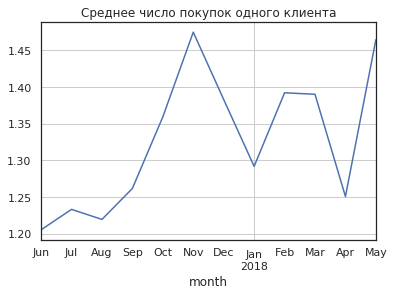

In [745]:
avg_u=visits3.groupby(['month']).agg({'Uid':['count','nunique']})
avg_u.columns=['n_buys','n_users']
avg_u['avg_buys']=avg_u['n_buys']/avg_u['n_users']
avg_u['avg_buys'].plot(grid=True, title='Среднее число покупок одного клиента')

Узнаем каков средний чек

In [746]:
avg_p=visits3.groupby(['month']).agg({'Revenue':['sum','count']})
avg_p.columns=['Revenue','n_buys']
avg_p['avg_price']=(avg_p['Revenue']/avg_p['n_buys']).round(1)
print('Средний чек равен ',avg_p['avg_price'].median())

Средний чек равен  4.65


<font color='blue'> Средний чек рассчитан Не совсем верно average_check = revenue.sum()/revenue.count(). </font>

<font color='blue'> Здесь можно графически отобразить динамику среднего чека. </font>

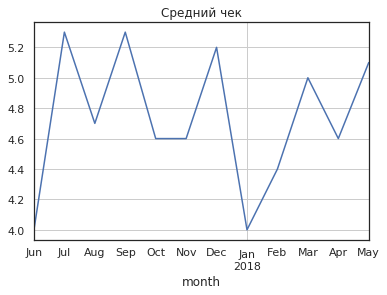

In [747]:
avg_p['avg_price'].plot(grid=True,title='Средний чек')

<font color='red'> Хорошо, здесь верно. </font>

### Рассчитаем LTV

Найдем месяц первой покупки для каждого клиента

In [748]:
first_orders = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.columns = ['Uid', 'first_order_month']
first_orders.first_order_month=first_orders.first_order_month.astype('datetime64[M]')
first_orders.head()

,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Подсчитаем количество клиентов в каждой когорте

In [749]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Объединим результаты 

In [750]:
orders_new = pd.merge(orders,first_orders, on='Uid')
orders_new=orders_new.rename(columns={'Buy Ts':'order_date'})
orders_new['order_month']=orders_new.order_date.astype('datetime64[M]')
orders_new.head()

,order_date,Revenue,Uid,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


Подсчитаем общую прибыль для каждой когорты

In [751]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Объединим результаты 

In [752]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head(12)

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
5,2017-06-01,2023,2017-11-01,1487.92
6,2017-06-01,2023,2017-12-01,1922.74
7,2017-06-01,2023,2018-01-01,1176.56
8,2017-06-01,2023,2018-02-01,1119.15
9,2017-06-01,2023,2018-03-01,1225.51


Узнаем продолжительность каждой когорты клиентов

In [753]:
report['age'] =( (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')
report.head()

,first_order_month,n_buyers,order_month,Revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


In [754]:
print('Средняя продолжительность когорты -',int(report['age'].median()),'месяца')

Средняя продолжительность когорты - 3 месяца


Найдем ltv в каждой когорте на каждый месяц

In [755]:
report['ltv'] = report['Revenue'] / report['n_buyers']  
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').cumsum(axis=1).round(2)  
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


<font color='blue'> Не уверена, что ltv стоит округлять доцелого. </font>

<font color='blue'> В таблице ltv стоит отображать нарастающим итогом, ведь именно такой смысл показателя. </font>

<font color='red'> Верно. </font>

Посчитаем средний ltv за 12 месяцев

In [756]:
float(report.pivot_table(
        index='first_order_month', 
        values='ltv', 
        aggfunc='sum').mean().round(2))

6.99

### Маркетинг

Приведем столбец с датами к нужному типу, добавим столбцы день, месяц и год для удобства группировки

In [757]:
costs.dt=pd.to_datetime(costs.dt)
costs['week']=costs['dt'].dt.week
costs['month']=costs['dt'].dt.to_period('M')
costs['year']=costs['dt'].dt.year
costs

,source_id,dt,costs,week,month,year
0,1,2017-06-01,75.20,22,2017-06,2017
1,1,2017-06-02,62.25,22,2017-06,2017
2,1,2017-06-03,36.53,22,2017-06,2017
3,1,2017-06-04,55.00,22,2017-06,2017
4,1,2017-06-05,57.08,23,2017-06,2017
...,...,...,...,...,...,...
2537,10,2018-05-27,9.92,21,2018-05,2018
2538,10,2018-05-28,21.26,22,2018-05,2018
2539,10,2018-05-29,11.32,22,2018-05,2018
2540,10,2018-05-30,33.15,22,2018-05,2018


Узнаем сколько денег потратили на маркетинг

In [758]:
print('Всего за 12 месяцев было потрачено',costs.costs.sum() ,'денег')

Всего за 12 месяцев было потрачено 329131.62 денег


На каждый источник было потрачено

In [759]:
costs.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

Распределение трат по месяцам

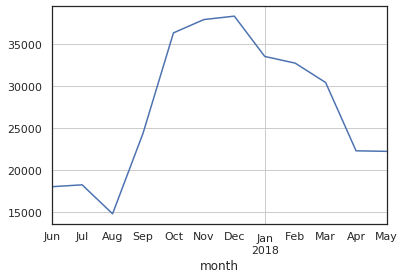

In [760]:
costs.groupby(['month']).costs.sum().plot(grid=True)

In [761]:
print('В среднем в месяц тратили' , costs.groupby(['month']).costs.sum().median().astype(int) ,'денег')

В среднем в месяц тратили 27392 денег


Подсчитаем сколько стоило привлечение одного покупателя из каждого источника

In [762]:
data2=visits4.groupby('Source Id')['Revenue'].sum().round()
data3=visits4.groupby('Source Id')['Device'].first()
data4=visits4.groupby('Source Id')['Buy Ts'].nunique()
data5=costs.groupby('source_id')['costs'].sum().round()
data6=pd.concat([data2,data3,data4, data5], axis=1)
data6['costs_per_u']=(data6['costs']/data6['Buy Ts']).round(3)
data6['rev_per_u']=(data6['Revenue']/data6['Buy Ts']).round(3)
data6['roi_%']=((data6['rev_per_u']-data6['costs_per_u'])/data6['costs_per_u']).round(3)
data6= data6.rename(columns={'Buy Ts':'n_buyers'})
data6

,Revenue,Device,n_buyers,costs,costs_per_u,rev_per_u,roi_%
1,34748.0,desktop,5174,20833.0,4.026,6.716,0.668
2,40391.0,touch,4627,42806.0,9.251,8.729,-0.056
3,38651.0,desktop,7728,141322.0,18.287,5.001,-0.727
4,42412.0,desktop,8600,61074.0,7.102,4.932,-0.306
5,40462.0,desktop,7330,51757.0,7.061,5.520,-0.218
7,1.0,desktop,1,NaN,NaN,1.000,NaN
9,3784.0,desktop,837,5517.0,6.591,4.521,-0.314
10,4067.0,desktop,1128,5822.0,5.161,3.605,-0.301


<font color='blue'> Costs per user он же CAC рассчитан не верно. Cost рассчитаны верно, а вот n_buyers - нет. Ты похоже считаешь  посетителей, а не покупателей</font>

Узнаем на сколько окупились расходы

Добавим к таблице report информацию о расходах

In [763]:
report['first_order_month']=report['first_order_month'].dt.to_period('M')
monthly_costs=costs.groupby('month')['costs'].sum().reset_index()
report_new = report.merge( monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['romi_%'] = ((report_new['ltv'] / report_new['cac'])*100).round(1)
report_new

,first_order_month,n_buyers,order_month,Revenue,age,ltv,month,costs,cac,romi_%
0,2017-06,2023,2017-06-01,9557.49,0,4.724414,2017-06,18015.00,8.905091,53.1
1,2017-06,2023,2017-07-01,981.82,1,0.485329,2017-06,18015.00,8.905091,5.5
2,2017-06,2023,2017-08-01,885.34,2,0.437637,2017-06,18015.00,8.905091,4.9
3,2017-06,2023,2017-09-01,1931.30,3,0.954671,2017-06,18015.00,8.905091,10.7
4,2017-06,2023,2017-10-01,2068.58,4,1.022531,2017-06,18015.00,8.905091,11.5
...,...,...,...,...,...,...,...,...,...,...
73,2018-03,3533,2018-04-01,1063.05,1,0.300892,2018-03,30415.27,8.608907,3.5
74,2018-03,3533,2018-05-01,1114.87,2,0.315559,2018-03,30415.27,8.608907,3.7
75,2018-04,2276,2018-04-01,10600.69,0,4.657597,2018-04,22289.38,9.793225,47.6
76,2018-04,2276,2018-05-01,1209.92,1,0.531599,2018-04,22289.38,9.793225,5.4


In [771]:
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi_%', 
        aggfunc='mean')
output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,53.1,58.6,63.5,74.2,85.7,94.0,104.7,111.2,117.4,124.2,130.6,133.5
2017-07,63.4,66.9,73.5,77.3,79.2,80.8,82.1,83.6,85.3,86.9,88.5,NaN
2017-08,48.9,53.3,57.5,61.1,65.7,68.3,70.3,74.1,76.8,78.5,NaN,NaN
2017-09,59.8,71.6,77.1,119.2,123.4,130.3,137.7,140.3,142.2,NaN,NaN,NaN
2017-10,59.8,66.2,68.5,70.4,72.2,73.6,74.6,76.0,NaN,NaN,NaN,NaN
2017-11,55.5,59.8,61.9,65.4,67.0,67.6,68.8,NaN,NaN,NaN,NaN,NaN
2017-12,54.2,57.2,67.8,80.0,83.6,87.5,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,41.6,44.6,47.7,49.1,49.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,46.4,49.5,50.4,51.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [772]:
output.cumsum(axis=1).mean(axis=0)

age
0      54.100000
1      58.218182
2      63.130000
3      71.988889
4      78.312500
5      86.014286
6      89.700000
7      97.040000
8     105.425000
9      96.533333
10    109.550000
11    133.500000
dtype: float64

В среденем затраты окупаются на 8 месяц

Отобразим на графике, как метрики отличаются по устройствам

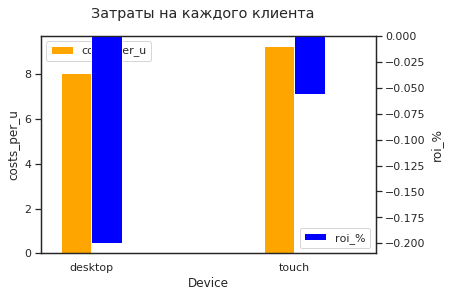

In [773]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.15
data6.groupby('Device')['costs_per_u'].mean().plot(kind='bar', color='orange', ax=ax, width=width, position=1, rot=0,legend="costs_per_id")
data6.groupby('Device')['roi_%'].mean().plot(kind='bar', color='blue', ax=ax2, width=width, position=0, rot=0, legend="ROI_%")
fig.suptitle("Затраты на каждого клиента")
ax.set_ylabel('costs_per_u')
ax2.set_ylabel('roi_%')
plt.show()

Отобразим на графике, как метрики отличаются по рекламным источникам

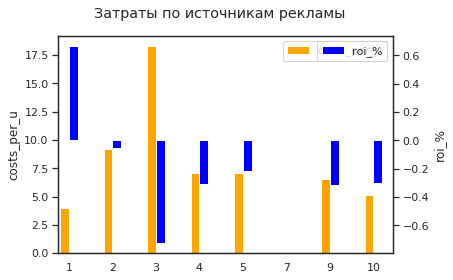

In [774]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.2
data6['costs_per_u'].plot(kind='bar', color='orange', ax=ax, width=width, position=1, rot=0,legend="costs_per_id")
data6['roi_%'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, rot=0, legend="ROI_%")
fig.suptitle("Затраты по источникам рекламы")
ax.set_ylabel('costs_per_u')
ax2.set_ylabel('roi_%')
plt.show()

Посмотрим как значения метрик меняются по месяцам

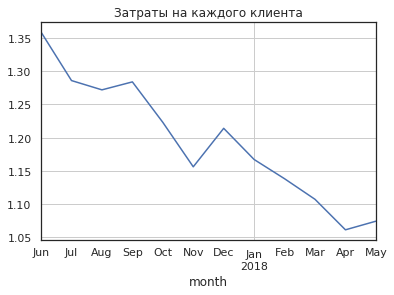

In [775]:
month4=visits2.groupby('month')['Uid'].nunique()
month5=costs.groupby('month')['costs'].sum().round()
month6=pd.concat([month4, month5], axis=1)
month6['costs_per_id']=(month6['costs']/month6['Uid']).round(3)
month6['costs_per_id'].plot( grid=True,title='Затраты на каждого клиента')

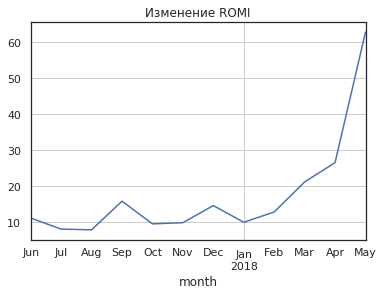

In [777]:
report_new.groupby('month')['romi_%'].mean().plot(grid=True,title='Изменение ROMI')

<font color='blue'> ROI рассчитан не верно. </font>

<font color='blue'> Надо рассчитывать ROI не для месяца, а для источника рекламы, чтоб понять какие окупаются, а какие нет. </font>

<font color='red'> Хорошо, теперь правильно. </font>

## Шаг 3. Выводы

1. Судя по распределению уникальных пользователей, большим спросом сервис пользуется зимой, летом клиенты реже покупают билеты. Однако это распределение согласуется с рекламными бюджетами.

2. Исходя из показателя удержания, пользователи редко пользуются сервисом повторно - число возвратов небольшое. Скорее всего это связано с тем, что клиенты не региструруются в сервисе и каждая новая сессия воспринимается как вход нового пользователя.

3. Судя по распределению ROI, в целом сервис пока работает в убыток, набирая аудиторию. 

4. Затраты на рекламу для мобильных больше, однако и эффективность тут больше, чем на ПК.

5. Самыми эффектиными источниками рекламы можно назвать 1 и 2, самым неэффективным - 3.

## Шаг 4. Рекомендации

1. Обычно в летний период люди меньше посещают мероприятия, театры уходят на каникулы. Поэтому увеличивать рекламный бюджет летом нет смысла.

2. Стоит придумать способ индецифитировать клиентов лучше, чтобы иметь более точные данные.

3. Несмотря на убыток рекламных компаний, наблюдается положительная динамика - затраты на клиента падают, а ROMI с каждым месяцем растет.

4. На мобильные устройства можно смело тратить бюджет. С настольными ПК стоит найти причину низкой прибыли и повысить средний чек.

5. Увеличивать бюджет можно для источников 1,2. В источнике 3 нужно искать причину такой низкой эффективности.

<font color='blue'> Проект требует доработок, многие рассчеты не точны, анализ не полный. Во всем проекте очень мало выводов. Это не просто решение задачек, а аналитический проект, тект играет очень важную роль. </font>

<font color='red'> Осталось retention поправить. </font>

Все ли выводы я сделал правильно? ничего не упустил?

<font color='blood'> Ок, retention поправился. </font>

<font color='blood'> Выводы достаточно полные. </font>